In [46]:
##Exploring Traveler data
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline 
train_file="C:\\Users\\hp\\Desktop\\DMALab-master\\deaths-in-india-satp-dfe_Final.csv"

data = pd.read_csv(train_file, header = 0,index_col=None)

Populating the interactive namespace from numpy and matplotlib


In [47]:
#dropping _goden as this attribute contains same value for all of its records
data.drop('_golden', axis = 1, inplace = True)
print("Dropping _golden")

#dropping _unit_state as this attribute contains same value for all of its records
data.drop('_unit_state',axis = 1, inplace = True)
print("Dropping _unit_state")

#dropping _accuracy as this attribute does not contain any value for all of its records
data.drop('accuracy',axis = 1, inplace = True)
print("Dropping accuracy")

#dropping civilians_gold as this attribute contains same value for all of its records
data.drop('civilians_gold',axis = 1, inplace = True)
print("Dropping civilians_gold")

#dropping militants_terrorists_insurgents_gold as this attribute contains same value for all of its records
data.drop('militants_terrorists_insurgents_gold',axis = 1, inplace = True)
print("Dropping militants_terrorists_insurgents_gold")

#droppin object as it is a redundant attribute
data.drop('object',axis = 1, inplace = True)
print("Dropping object")

#dropping security_forces_gold as this attribute does not contain any value for all of its records
data.drop('security_forces_gold',axis = 1, inplace = True)
print("Dropping security_forces_gold")

#dropping sid as this attribute is not helpful possible prediction of future attacks
data.drop('sid',axis = 1, inplace = True)
print("Dropping sid")

#dropping srid as this attribute does not contain any value for all of its records
data.drop('srid',axis = 1, inplace = True)
print("Dropping srid")

#droppin state as it is a redundant attribute
data.drop('state',axis = 1, inplace = True)
print("Dropping state")

#dropping svmlabel2 as this attribute is not helpful possible prediction of future attacks
data.drop('svmlabel2',axis = 1, inplace = True)
print("Dropping svmlabel2")

#dropping svmlabel2prob as this attribute is not helpful possible prediction of future attacks
data.drop('svmlabel2prob',axis = 1, inplace = True)
print("Dropping svmlabel2prob")

#dropping svmobjecttypelab as this attribute contains same value for all of its records
data.drop('svmobjecttypelab',axis = 1, inplace = True)
print("Dropping svmobjecttypelab")

#dropping svmobjecttypeprob as this attribute is not helpful possible prediction of future attacks
data.drop('svmobjecttypeprob',axis = 1, inplace = True)
print("Dropping svmobjecttypeprob")

#dropping total_number_of_people_gold as this attribute does not contain any value for all of its records
data.drop('total_number_of_people_gold',axis = 1, inplace = True)
print("Dropping total_number_of_people_gold")

data.drop('date',axis = 1, inplace = True)
print("Dropping date")

#dropping _trusted_judgments as this attribute contains same value for all of its records
data.drop('_trusted_judgments',axis = 1, inplace = True)
print("_trusted_judgments")

#dropping objectcleanpp as this attribute does nothelp for our prediction
data.drop('objectcleanpp',axis = 1, inplace = True)
print("objectcleanpp")

Dropping _golden
Dropping _unit_state
Dropping accuracy
Dropping civilians_gold
Dropping militants_terrorists_insurgents_gold
Dropping object
Dropping security_forces_gold
Dropping sid
Dropping srid
Dropping state
Dropping svmlabel2
Dropping svmlabel2prob
Dropping svmobjecttypelab
Dropping svmobjecttypeprob
Dropping total_number_of_people_gold
Dropping date


In [48]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,27223,27224,27225,27226,27227,27228,27229,27230,27231,27232
_unit_id,711601341,711601342,711601343,711601344,711601345,711601346,711601347,711601348,711601349,711601350,...,712482413,712482423,712482442,712482447,712482461,712482465,712482476,712482485,712482493,712482497
_trusted_judgments,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
_last_judgment_at,4/30/15 8:54,4/30/15 9:41,4/30/15 8:35,4/30/15 9:12,4/30/15 9:23,4/30/15 8:36,4/30/15 8:51,4/30/15 9:29,4/30/15 8:55,4/30/15 8:16,...,05-05-2015 03:56,05-04-2015 18:36,05-05-2015 09:46,05-06-2015 05:09,05-06-2015 04:17,05-05-2015 13:45,05-05-2015 06:23,05-05-2015 13:08,05-05-2015 05:48,05-06-2015 03:21
civilians,0,0,0,NaN,0,0,0,1,0,3,...,0,0,0,NaN,0,0,0,0,0,0
militants_terrorists_insurgents,3,7,1,7,2,1,0,0,3,0,...,3,1,3,NaN,2,4,1,1,1,1
security_forces,1,0,0,NaN,0,0,1,0,0,0,...,0,0,0,2,0,0,0,0,0,0
canddist,NaN,Baramulla,NaN,Kamrup,Karimnagar,Tinsukia,Churachandpur,NaN,NaN,Sibsagar,...,Imphal West,Dibrugarh,Palamu,NaN,NaN,West Singhbhum,Patna,Sundargarh,Ganderbal,Latehar
districtmatch,srinagar,baramulla,calcutta,kamrup,karimnagar,tinsukia,churachandpur,srinagar,jorhat,sibsagar,...,imphal west,dibrugarh,palamu,jammu,kulgam,west singhbhum,patna,sundargarh,ganderbal,latehar
eventid,3,4,13,15,41,46,52,56,123,124,...,94258,141700,247876,327015,60782,316428,40669,264303,225666,206819
objectcleanpp,militants and security forces personnel,other militants,top naga rebel and associate national socialis...,militants garo national front gnf underground ...,suspected naxalites belonging to pwg,ulfa rebel,district jawan,shah,suspected national socialist council nagaland ...,people,...,people liberation army pla cadres fc be bc ss ...,ulfa cadre pramulya boruah village police stat...,asfar ansari and ravindra bhuiyan,and policemen,lashkar toiba let terrorists,communist party india maoist cpi aoist cadres ...,supporter communist party india marxist lenini...,armed maoist cadre,pakistani militant let,arun yadav maoist village


In [49]:
date=data['report_date']
import re
#print (date.dtype)
import datetime

for var in date:
    if(re.search("/",str(var))):
        var1=re.sub('/','-',str(var))
        var2=datetime.datetime.strptime(var1, '%m-%d-%y').date()
        data['report_date'].replace(var,var2,inplace=True)
    else:
        if(re.match("[0-9]{4}-[0-9]{2}-[0-9]{2}",str(var))):
            var=var
        else:
            var2=datetime.datetime.strptime(str(var), '%m-%d-%Y').strftime("%Y-%m-%d")
            data['report_date'].replace(var,var2,inplace=True)
        
        
     


In [50]:
#converting into Standard date format Y-M-D
data['report_date'] = pd.to_datetime(data['report_date'], format='%Y-%m-%d')


In [51]:
date2=data['_last_judgment_at']
import re
import datetime

for var in date2:
    if(re.search("/",str(var))):
        var1=re.sub('/','-',str(var))
        var1=var1[0:7]
        var2=datetime.datetime.strptime(var1, '%m-%d-%y').date()
        data['_last_judgment_at'].replace(var,var2,inplace=True)
    else:
        if(re.match("[0-9]{4}-[0-9]{2}-[0-9]{2}",str(var))):
            var1=var
        else:
            var2=datetime.datetime.strptime(str(var)[0:10], '%m-%d-%Y').strftime("%Y-%m-%d")
            data['_last_judgment_at'].replace(var,var2,inplace=True)
        
        
     

In [52]:
#converting into Standard date format Y-M-D
data['_last_judgment_at'] = pd.to_datetime(data['_last_judgment_at'], format='%Y-%m-%d')


In [53]:
# Fill state_full column
print("Filling state_full column...")
data['state_full'].fillna('NA', inplace=True)
print("Filling state_full column...completed")

Filling state_full column...
Filling state_full column...completed


In [54]:
#replacing similar data of the attribute
replaceVerb=data['verb']
import re

for var in replaceVerb:
    if(re.search("killing",str(var)) or re.search("kill",str(var))):
        var2='killed'
        data['verb'].replace(var,var2,inplace=True)
    elif(re.search("arresting",str(var)) or re.search("arrest",str(var))):
        var2='arrested'
        data['verb'].replace(var,var2,inplace=True)
    elif(re.search("surrender",str(var)) or re.search("surrendering",str(var))):
        var2='surrendered'
        data['verb'].replace(var,var2,inplace=True)
    elif(re.search("injuring",str(var)) or re.search("injure",str(var))):
        var2='injured'
        data['verb'].replace(var,var2,inplace=True)

In [55]:
def convert_to_binary(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert[:4] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

# One Hot Encoding
print("One Hot Encoding categorical data...")
columns_to_convert = ['state_full','svmlabel1','verb']

for column in columns_to_convert:
    data = convert_to_binary(data,column)
    data.drop(column, axis=1, inplace=True)
print("One Hot Encoding categorical data...completed")

One Hot Encoding categorical data...
One Hot Encoding categorical data...completed


In [56]:
data.drop('verb_wounding',axis = 1, inplace = True)

In [57]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,27223,27224,27225,27226,27227,27228,27229,27230,27231,27232
_unit_id,711601341,711601342,711601343,711601344,711601345,711601346,711601347,711601348,711601349,711601350,...,712482413,712482423,712482442,712482447,712482461,712482465,712482476,712482485,712482493,712482497
_trusted_judgments,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
_last_judgment_at,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,...,2015-05-05 00:00:00,2015-05-04 00:00:00,2015-05-05 00:00:00,2015-05-06 00:00:00,2015-05-06 00:00:00,2015-05-05 00:00:00,2015-05-05 00:00:00,2015-05-05 00:00:00,2015-05-05 00:00:00,2015-05-06 00:00:00
civilians,0,0,0,NaN,0,0,0,1,0,3,...,0,0,0,NaN,0,0,0,0,0,0
militants_terrorists_insurgents,3,7,1,7,2,1,0,0,3,0,...,3,1,3,NaN,2,4,1,1,1,1
security_forces,1,0,0,NaN,0,0,1,0,0,0,...,0,0,0,2,0,0,0,0,0,0
canddist,NaN,Baramulla,NaN,Kamrup,Karimnagar,Tinsukia,Churachandpur,NaN,NaN,Sibsagar,...,Imphal West,Dibrugarh,Palamu,NaN,NaN,West Singhbhum,Patna,Sundargarh,Ganderbal,Latehar
districtmatch,srinagar,baramulla,calcutta,kamrup,karimnagar,tinsukia,churachandpur,srinagar,jorhat,sibsagar,...,imphal west,dibrugarh,palamu,jammu,kulgam,west singhbhum,patna,sundargarh,ganderbal,latehar
eventid,3,4,13,15,41,46,52,56,123,124,...,94258,141700,247876,327015,60782,316428,40669,264303,225666,206819
objectcleanpp,militants and security forces personnel,other militants,top naga rebel and associate national socialis...,militants garo national front gnf underground ...,suspected naxalites belonging to pwg,ulfa rebel,district jawan,shah,suspected national socialist council nagaland ...,people,...,people liberation army pla cadres fc be bc ss ...,ulfa cadre pramulya boruah village police stat...,asfar ansari and ravindra bhuiyan,and policemen,lashkar toiba let terrorists,communist party india maoist cpi aoist cadres ...,supporter communist party india marxist lenini...,armed maoist cadre,pakistani militant let,arun yadav maoist village


In [58]:
#to find total number of deaths based on verb Sentence 
killed=data['verb_killed'].sum()

arrested=data['verb_arrested'].sum()

surrendered=data['verb_surrendere'].sum()

injured=data['verb_injured'].sum()

wounded=data['verb_wounded'].sum()




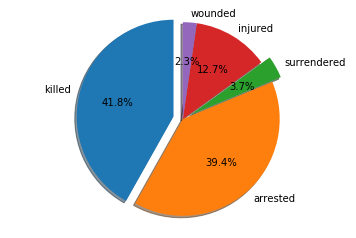

In [59]:
# Pie chart
labels = 'killed','arrested', 'surrendered', 'injured' ,'wounded'
sizes = [killed,arrested,surrendered,injured,wounded]
explode = (0.1, 0, 0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode =explode ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [60]:
#to find total number of deaths based on profession 
security=data['svml_security'].sum()

terrorist=data['svml_terrorist'].sum()

civilian=data['svml_civilian'].sum()

public=data['svml_public'].sum()

private=data['svml_private'].sum()


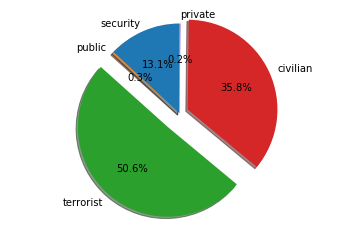

In [61]:
# Pie chart
labels = 'security','public', 'terrorist', 'civilian' ,'private'
sizes = [security,public,terrorist,civilian,private]
explode = (0, 0, 0.2, 0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode =explode ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [62]:
# Fill civilians column
print("Filling civilians column...")
data['civilians'].fillna(-1, inplace=True)
print("Filling civilians column...completed")

Filling civilians column...
Filling civilians column...completed


In [63]:
# Fill militants_terrorists_insurgents column
print("Filling militants_terrorists_insurgents column...")
data['militants_terrorists_insurgents'].fillna(-1, inplace=True)
print("Filling militants_terrorists_insurgents column...completed")

Filling militants_terrorists_insurgents column...
Filling militants_terrorists_insurgents column...completed


In [64]:
# Fill security_forces column
print("Filling security_forces column...")
data['security_forces'].fillna(-1, inplace=True)
print("Filling security_forces column...completed")

Filling security_forces column...
Filling security_forces column...completed


In [65]:
# Fill Subject column
print("Filling subject column...")
data['subject'].fillna('unknown', inplace=True)
print("Filling Subject column...completed")




Filling subject column...
Filling Subject column...completed


In [66]:
len(data)

27233

In [67]:
data.shape[0]

27233

In [105]:


for date2 in data['report_date']:
    month=date2.dt.month
    date=date2.dt.day
    
    

0        30
1        30
2        30
3        30
4        30
5        30
6        30
7        30
8        30
9        30
10       30
11       30
12       30
13       30
14       30
15       30
16       30
17       30
18       30
19       30
20       30
21       30
22       30
23       30
24       30
25       30
26       30
27       30
28       30
29       30
         ..
27203     4
27204     6
27205     5
27206     4
27207     5
27208     5
27209     5
27210     5
27211     6
27212     4
27213     5
27214     6
27215     4
27216     4
27217     4
27218     6
27219     5
27220     4
27221     4
27222     5
27223     5
27224     4
27225     5
27226     6
27227     6
27228     5
27229     5
27230     5
27231     5
27232     6
Name: _last_judgment_at, Length: 27233, dtype: int64